In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

Unnamed: 0  time portfolio  stock  order
0                 1   993     yshfc      1   -1.0
1                 2   993     yshfc      2   -2.0
2                10   993     yshfc     10    1.0
3                11   993     yshfc     11    1.0
4                13   993     yshfc     13   -1.0
...             ...   ...       ...    ...    ...
3836251           7  8192     xbcot     35    1.0
3836252           9  8192     xbcot     42    1.0
3836253           2  8192     jmeyl     76    1.0
3836254           3  8192     jmeyl     43   -1.0
3836255          16  8192     jmeyl     66   -1.0

[3836256 rows x 5 columns]

In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106


In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106


In [5]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106
Cascade length:  6521
New Orders left:  1315585
making new cascade


OG Orders left:  1315585
Cascade length:  4369
New Orders left:  1311216
making new cascade


OG Orders left:  1311216
Cascade length:  4373
New Orders left:  1306843
making new cascade


OG Orders left:  1306843
Cascade length:  2
New Orders left:  1306841
making new cascade


OG Orders left:  1306841
Cascade length:  4036
New Orders left:  1302805
making new cascade


OG Orders left:  1302805
Cascade length:  4
New Orders left:  1302801
making new cascade


OG Orders left:  1302801
Cascade length:  8
New Orders left:  1302793
making new cascade


OG Orders left:  1302793
Cascade length:  4071
New Orders left:  1298722
making new cascade


OG Orders left:  1298722
Cascade length:  1562
New Orders left:  1297160
making new cascade


OG Orders left:  1297160
Cascade length:  3957
New Orders left:  1293203
making new cascade


OG Orders left:  1293203
Cascade length:  2897
New Orders left:  1290

Cascade length:  2023
New Orders left:  1220472
making new cascade


OG Orders left:  1220472
Cascade length:  520
New Orders left:  1219952
making new cascade


OG Orders left:  1219952
Cascade length:  1162
New Orders left:  1218790
making new cascade


OG Orders left:  1218790
Cascade length:  23
New Orders left:  1218767
making new cascade


OG Orders left:  1218767
Cascade length:  18
New Orders left:  1218749
making new cascade


OG Orders left:  1218749
Cascade length:  860
New Orders left:  1217889
making new cascade


OG Orders left:  1217889
Cascade length:  426
New Orders left:  1217463
making new cascade


OG Orders left:  1217463
Cascade length:  625
New Orders left:  1216838
making new cascade


OG Orders left:  1216838
Cascade length:  1242
New Orders left:  1215596
making new cascade


OG Orders left:  1215596
Cascade length:  11
New Orders left:  1215585
making new cascade


OG Orders left:  1215585
Cascade length:  3
New Orders left:  1215582
making new cascade


OG O

Cascade length:  31
New Orders left:  1181784
making new cascade


OG Orders left:  1181784
Cascade length:  2073
New Orders left:  1179711
making new cascade


OG Orders left:  1179711
Cascade length:  832
New Orders left:  1178879
making new cascade


OG Orders left:  1178879
Cascade length:  2107
New Orders left:  1176772
making new cascade


OG Orders left:  1176772
Cascade length:  8
New Orders left:  1176764
making new cascade


OG Orders left:  1176764
Cascade length:  13
New Orders left:  1176751
making new cascade


OG Orders left:  1176751
Cascade length:  626
New Orders left:  1176125
making new cascade


OG Orders left:  1176125
Cascade length:  1421
New Orders left:  1174704
making new cascade


OG Orders left:  1174704
Cascade length:  4
New Orders left:  1174700
making new cascade


OG Orders left:  1174700
Cascade length:  1246
New Orders left:  1173454
making new cascade


OG Orders left:  1173454
Cascade length:  1
New Orders left:  1173453
making new cascade


OG Ord

Cascade length:  1272
New Orders left:  1137024
making new cascade


OG Orders left:  1137024
Cascade length:  2
New Orders left:  1137022
making new cascade


OG Orders left:  1137022
Cascade length:  1
New Orders left:  1137021
making new cascade


OG Orders left:  1137021
Cascade length:  679
New Orders left:  1136342
making new cascade


OG Orders left:  1136342
Cascade length:  4
New Orders left:  1136338
making new cascade


OG Orders left:  1136338
Cascade length:  890
New Orders left:  1135448
making new cascade


OG Orders left:  1135448
Cascade length:  91
New Orders left:  1135357
making new cascade


OG Orders left:  1135357
Cascade length:  3
New Orders left:  1135354
making new cascade


OG Orders left:  1135354
Cascade length:  50
New Orders left:  1135304
making new cascade


OG Orders left:  1135304
Cascade length:  4
New Orders left:  1135300
making new cascade


OG Orders left:  1135300
Cascade length:  723
New Orders left:  1134577
making new cascade


OG Orders lef

Cascade length:  20
New Orders left:  1108834
making new cascade


OG Orders left:  1108834
Cascade length:  634
New Orders left:  1108200
making new cascade


OG Orders left:  1108200
Cascade length:  666
New Orders left:  1107534
making new cascade


OG Orders left:  1107534
Cascade length:  43
New Orders left:  1107491
making new cascade


OG Orders left:  1107491
Cascade length:  4
New Orders left:  1107487
making new cascade


OG Orders left:  1107487
Cascade length:  1148
New Orders left:  1106339
making new cascade


OG Orders left:  1106339
Cascade length:  634
New Orders left:  1105705
making new cascade


OG Orders left:  1105705
Cascade length:  1954
New Orders left:  1103751
making new cascade


OG Orders left:  1103751
Cascade length:  6
New Orders left:  1103745
making new cascade


OG Orders left:  1103745
Cascade length:  88
New Orders left:  1103657
making new cascade


OG Orders left:  1103657
Cascade length:  5
New Orders left:  1103652
making new cascade


OG Orders

Cascade length:  2
New Orders left:  1084668
making new cascade


OG Orders left:  1084668
Cascade length:  54
New Orders left:  1084614
making new cascade


OG Orders left:  1084614
Cascade length:  8
New Orders left:  1084606
making new cascade


OG Orders left:  1084606
Cascade length:  87
New Orders left:  1084519
making new cascade


OG Orders left:  1084519
Cascade length:  86
New Orders left:  1084433
making new cascade


OG Orders left:  1084433
Cascade length:  1844
New Orders left:  1082589
making new cascade


OG Orders left:  1082589
Cascade length:  84
New Orders left:  1082505
making new cascade


OG Orders left:  1082505
Cascade length:  1
New Orders left:  1082504
making new cascade


OG Orders left:  1082504
Cascade length:  6
New Orders left:  1082498
making new cascade


OG Orders left:  1082498
Cascade length:  1
New Orders left:  1082497
making new cascade


OG Orders left:  1082497
Cascade length:  66
New Orders left:  1082431
making new cascade


OG Orders left: 

Cascade length:  1
New Orders left:  1061164
making new cascade


OG Orders left:  1061164
Cascade length:  1457
New Orders left:  1059707
making new cascade


OG Orders left:  1059707
Cascade length:  2
New Orders left:  1059705
making new cascade


OG Orders left:  1059705
Cascade length:  39
New Orders left:  1059666
making new cascade


OG Orders left:  1059666
Cascade length:  40
New Orders left:  1059626
making new cascade


OG Orders left:  1059626
Cascade length:  93
New Orders left:  1059533
making new cascade


OG Orders left:  1059533
Cascade length:  1
New Orders left:  1059532
making new cascade


OG Orders left:  1059532
Cascade length:  1400
New Orders left:  1058132
making new cascade


OG Orders left:  1058132
Cascade length:  32
New Orders left:  1058100
making new cascade


OG Orders left:  1058100
Cascade length:  53
New Orders left:  1058047
making new cascade


OG Orders left:  1058047
Cascade length:  37
New Orders left:  1058010
making new cascade


OG Orders le

Cascade length:  1189
New Orders left:  1026053
making new cascade


OG Orders left:  1026053
Cascade length:  357
New Orders left:  1025696
making new cascade


OG Orders left:  1025696
Cascade length:  6
New Orders left:  1025690
making new cascade


OG Orders left:  1025690
Cascade length:  83
New Orders left:  1025607
making new cascade


OG Orders left:  1025607
Cascade length:  198
New Orders left:  1025409
making new cascade


OG Orders left:  1025409
Cascade length:  598
New Orders left:  1024811
making new cascade


OG Orders left:  1024811
Cascade length:  83
New Orders left:  1024728
making new cascade


OG Orders left:  1024728
Cascade length:  11
New Orders left:  1024717
making new cascade


OG Orders left:  1024717
Cascade length:  1
New Orders left:  1024716
making new cascade


OG Orders left:  1024716
Cascade length:  8
New Orders left:  1024708
making new cascade


OG Orders left:  1024708
Cascade length:  87
New Orders left:  1024621
making new cascade


OG Orders l

Cascade length:  556
New Orders left:  996231
making new cascade


OG Orders left:  996231
Cascade length:  87
New Orders left:  996144
making new cascade


OG Orders left:  996144
Cascade length:  1027
New Orders left:  995117
making new cascade


OG Orders left:  995117
Cascade length:  115
New Orders left:  995002
making new cascade


OG Orders left:  995002
Cascade length:  21
New Orders left:  994981
making new cascade


OG Orders left:  994981
Cascade length:  2
New Orders left:  994979
making new cascade


OG Orders left:  994979
Cascade length:  704
New Orders left:  994275
making new cascade


OG Orders left:  994275
Cascade length:  341
New Orders left:  993934
making new cascade


OG Orders left:  993934
Cascade length:  61
New Orders left:  993873
making new cascade


OG Orders left:  993873
Cascade length:  14
New Orders left:  993859
making new cascade


OG Orders left:  993859
Cascade length:  448
New Orders left:  993411
making new cascade


OG Orders left:  993411
Casc

Cascade length:  11
New Orders left:  942602
making new cascade


OG Orders left:  942602
Cascade length:  9
New Orders left:  942593
making new cascade


OG Orders left:  942593
Cascade length:  789
New Orders left:  941804
making new cascade


OG Orders left:  941804
Cascade length:  1127
New Orders left:  940677
making new cascade


OG Orders left:  940677
Cascade length:  26
New Orders left:  940651
making new cascade


OG Orders left:  940651
Cascade length:  16
New Orders left:  940635
making new cascade


OG Orders left:  940635
Cascade length:  809
New Orders left:  939826
making new cascade


OG Orders left:  939826
Cascade length:  9
New Orders left:  939817
making new cascade


OG Orders left:  939817
Cascade length:  1282
New Orders left:  938535
making new cascade


OG Orders left:  938535
Cascade length:  63
New Orders left:  938472
making new cascade


OG Orders left:  938472
Cascade length:  168
New Orders left:  938304
making new cascade


OG Orders left:  938304
Casca

Cascade length:  44
New Orders left:  908837
making new cascade


OG Orders left:  908837
Cascade length:  1530
New Orders left:  907307
making new cascade


OG Orders left:  907307
Cascade length:  47
New Orders left:  907260
making new cascade


OG Orders left:  907260
Cascade length:  1405
New Orders left:  905855
making new cascade


OG Orders left:  905855
Cascade length:  1
New Orders left:  905854
making new cascade


OG Orders left:  905854
Cascade length:  51
New Orders left:  905803
making new cascade


OG Orders left:  905803
Cascade length:  64
New Orders left:  905739
making new cascade


OG Orders left:  905739
Cascade length:  1714
New Orders left:  904025
making new cascade


OG Orders left:  904025
Cascade length:  12
New Orders left:  904013
making new cascade


OG Orders left:  904013
Cascade length:  357
New Orders left:  903656
making new cascade


OG Orders left:  903656
Cascade length:  144
New Orders left:  903512
making new cascade


OG Orders left:  903512
Cas

Cascade length:  2162
New Orders left:  868948
making new cascade


OG Orders left:  868948
Cascade length:  1
New Orders left:  868947
making new cascade


OG Orders left:  868947
Cascade length:  815
New Orders left:  868132
making new cascade


OG Orders left:  868132
Cascade length:  21
New Orders left:  868111
making new cascade


OG Orders left:  868111
Cascade length:  38
New Orders left:  868073
making new cascade


OG Orders left:  868073
Cascade length:  116
New Orders left:  867957
making new cascade


OG Orders left:  867957
Cascade length:  64
New Orders left:  867893
making new cascade


OG Orders left:  867893
Cascade length:  255
New Orders left:  867638
making new cascade


OG Orders left:  867638
Cascade length:  657
New Orders left:  866981
making new cascade


OG Orders left:  866981
Cascade length:  2
New Orders left:  866979
making new cascade


OG Orders left:  866979
Cascade length:  11
New Orders left:  866968
making new cascade


OG Orders left:  866968
Cascad

Cascade length:  22
New Orders left:  838732
making new cascade


OG Orders left:  838732
Cascade length:  11
New Orders left:  838721
making new cascade


OG Orders left:  838721
Cascade length:  186
New Orders left:  838535
making new cascade


OG Orders left:  838535
Cascade length:  1
New Orders left:  838534
making new cascade


OG Orders left:  838534
Cascade length:  1092
New Orders left:  837442
making new cascade


OG Orders left:  837442
Cascade length:  1796
New Orders left:  835646
making new cascade


OG Orders left:  835646
Cascade length:  1334
New Orders left:  834312
making new cascade


OG Orders left:  834312
Cascade length:  11
New Orders left:  834301
making new cascade


OG Orders left:  834301
Cascade length:  27
New Orders left:  834274
making new cascade


OG Orders left:  834274
Cascade length:  840
New Orders left:  833434
making new cascade


OG Orders left:  833434
Cascade length:  79
New Orders left:  833355
making new cascade


OG Orders left:  833355
Cas

Cascade length:  6
New Orders left:  806560
making new cascade


OG Orders left:  806560
Cascade length:  1113
New Orders left:  805447
making new cascade


OG Orders left:  805447
Cascade length:  35
New Orders left:  805412
making new cascade


OG Orders left:  805412
Cascade length:  1306
New Orders left:  804106
making new cascade


OG Orders left:  804106
Cascade length:  1677
New Orders left:  802429
making new cascade


OG Orders left:  802429
Cascade length:  182
New Orders left:  802247
making new cascade


OG Orders left:  802247
Cascade length:  91
New Orders left:  802156
making new cascade


OG Orders left:  802156
Cascade length:  14
New Orders left:  802142
making new cascade


OG Orders left:  802142
Cascade length:  6
New Orders left:  802136
making new cascade


OG Orders left:  802136
Cascade length:  18
New Orders left:  802118
making new cascade


OG Orders left:  802118
Cascade length:  16
New Orders left:  802102
making new cascade


OG Orders left:  802102
Casca

Cascade length:  710
New Orders left:  774745
making new cascade


OG Orders left:  774745
Cascade length:  52
New Orders left:  774693
making new cascade


OG Orders left:  774693
Cascade length:  32
New Orders left:  774661
making new cascade


OG Orders left:  774661
Cascade length:  794
New Orders left:  773867
making new cascade


OG Orders left:  773867
Cascade length:  56
New Orders left:  773811
making new cascade


OG Orders left:  773811
Cascade length:  66
New Orders left:  773745
making new cascade


OG Orders left:  773745
Cascade length:  508
New Orders left:  773237
making new cascade


OG Orders left:  773237
Cascade length:  936
New Orders left:  772301
making new cascade


OG Orders left:  772301
Cascade length:  1328
New Orders left:  770973
making new cascade


OG Orders left:  770973
Cascade length:  108
New Orders left:  770865
making new cascade


OG Orders left:  770865
Cascade length:  1006
New Orders left:  769859
making new cascade


OG Orders left:  769859
C

Cascade length:  2972
New Orders left:  732966
making new cascade


OG Orders left:  732966
Cascade length:  3
New Orders left:  732963
making new cascade


OG Orders left:  732963
Cascade length:  2759
New Orders left:  730204
making new cascade


OG Orders left:  730204
Cascade length:  64
New Orders left:  730140
making new cascade


OG Orders left:  730140
Cascade length:  378
New Orders left:  729762
making new cascade


OG Orders left:  729762
Cascade length:  3
New Orders left:  729759
making new cascade


OG Orders left:  729759
Cascade length:  61
New Orders left:  729698
making new cascade


OG Orders left:  729698
Cascade length:  743
New Orders left:  728955
making new cascade


OG Orders left:  728955
Cascade length:  968
New Orders left:  727987
making new cascade


OG Orders left:  727987
Cascade length:  100
New Orders left:  727887
making new cascade


OG Orders left:  727887
Cascade length:  978
New Orders left:  726909
making new cascade


OG Orders left:  726909
Cas

Cascade length:  49
New Orders left:  690650
making new cascade


OG Orders left:  690650
Cascade length:  44
New Orders left:  690606
making new cascade


OG Orders left:  690606
Cascade length:  2253
New Orders left:  688353
making new cascade


OG Orders left:  688353
Cascade length:  235
New Orders left:  688118
making new cascade


OG Orders left:  688118
Cascade length:  2203
New Orders left:  685915
making new cascade


OG Orders left:  685915
Cascade length:  90
New Orders left:  685825
making new cascade


OG Orders left:  685825
Cascade length:  1259
New Orders left:  684566
making new cascade


OG Orders left:  684566
Cascade length:  12
New Orders left:  684554
making new cascade


OG Orders left:  684554
Cascade length:  15
New Orders left:  684539
making new cascade


OG Orders left:  684539
Cascade length:  104
New Orders left:  684435
making new cascade


OG Orders left:  684435
Cascade length:  184
New Orders left:  684251
making new cascade


OG Orders left:  684251
C

Cascade length:  344
New Orders left:  637887
making new cascade


OG Orders left:  637887
Cascade length:  1613
New Orders left:  636274
making new cascade


OG Orders left:  636274
Cascade length:  232
New Orders left:  636042
making new cascade


OG Orders left:  636042
Cascade length:  545
New Orders left:  635497
making new cascade


OG Orders left:  635497
Cascade length:  5
New Orders left:  635492
making new cascade


OG Orders left:  635492
Cascade length:  1231
New Orders left:  634261
making new cascade


OG Orders left:  634261
Cascade length:  15
New Orders left:  634246
making new cascade


OG Orders left:  634246
Cascade length:  2124
New Orders left:  632122
making new cascade


OG Orders left:  632122
Cascade length:  573
New Orders left:  631549
making new cascade


OG Orders left:  631549
Cascade length:  2
New Orders left:  631547
making new cascade


OG Orders left:  631547
Cascade length:  14
New Orders left:  631533
making new cascade


OG Orders left:  631533
Ca

Cascade length:  1
New Orders left:  602229
making new cascade


OG Orders left:  602229
Cascade length:  722
New Orders left:  601507
making new cascade


OG Orders left:  601507
Cascade length:  56
New Orders left:  601451
making new cascade


OG Orders left:  601451
Cascade length:  31
New Orders left:  601420
making new cascade


OG Orders left:  601420
Cascade length:  1772
New Orders left:  599648
making new cascade


OG Orders left:  599648
Cascade length:  10
New Orders left:  599638
making new cascade


OG Orders left:  599638
Cascade length:  15
New Orders left:  599623
making new cascade


OG Orders left:  599623
Cascade length:  55
New Orders left:  599568
making new cascade


OG Orders left:  599568
Cascade length:  2657
New Orders left:  596911
making new cascade


OG Orders left:  596911
Cascade length:  43
New Orders left:  596868
making new cascade


OG Orders left:  596868
Cascade length:  1965
New Orders left:  594903
making new cascade


OG Orders left:  594903
Casc

Cascade length:  57
New Orders left:  559768
making new cascade


OG Orders left:  559768
Cascade length:  8
New Orders left:  559760
making new cascade


OG Orders left:  559760
Cascade length:  1052
New Orders left:  558708
making new cascade


OG Orders left:  558708
Cascade length:  4
New Orders left:  558704
making new cascade


OG Orders left:  558704
Cascade length:  275
New Orders left:  558429
making new cascade


OG Orders left:  558429
Cascade length:  3
New Orders left:  558426
making new cascade


OG Orders left:  558426
Cascade length:  408
New Orders left:  558018
making new cascade


OG Orders left:  558018
Cascade length:  59
New Orders left:  557959
making new cascade


OG Orders left:  557959
Cascade length:  1105
New Orders left:  556854
making new cascade


OG Orders left:  556854
Cascade length:  2
New Orders left:  556852
making new cascade


OG Orders left:  556852
Cascade length:  2
New Orders left:  556850
making new cascade


OG Orders left:  556850
Cascade l

Cascade length:  390
New Orders left:  524318
making new cascade


OG Orders left:  524318
Cascade length:  56
New Orders left:  524262
making new cascade


OG Orders left:  524262
Cascade length:  94
New Orders left:  524168
making new cascade


OG Orders left:  524168
Cascade length:  627
New Orders left:  523541
making new cascade


OG Orders left:  523541
Cascade length:  53
New Orders left:  523488
making new cascade


OG Orders left:  523488
Cascade length:  10
New Orders left:  523478
making new cascade


OG Orders left:  523478
Cascade length:  183
New Orders left:  523295
making new cascade


OG Orders left:  523295
Cascade length:  1073
New Orders left:  522222
making new cascade


OG Orders left:  522222
Cascade length:  1
New Orders left:  522221
making new cascade


OG Orders left:  522221
Cascade length:  115
New Orders left:  522106
making new cascade


OG Orders left:  522106
Cascade length:  58
New Orders left:  522048
making new cascade


OG Orders left:  522048
Casca

Cascade length:  2
New Orders left:  487884
making new cascade


OG Orders left:  487884
Cascade length:  35
New Orders left:  487849
making new cascade


OG Orders left:  487849
Cascade length:  3
New Orders left:  487846
making new cascade


OG Orders left:  487846
Cascade length:  326
New Orders left:  487520
making new cascade


OG Orders left:  487520
Cascade length:  83
New Orders left:  487437
making new cascade


OG Orders left:  487437
Cascade length:  1645
New Orders left:  485792
making new cascade


OG Orders left:  485792
Cascade length:  622
New Orders left:  485170
making new cascade


OG Orders left:  485170
Cascade length:  76
New Orders left:  485094
making new cascade


OG Orders left:  485094
Cascade length:  20
New Orders left:  485074
making new cascade


OG Orders left:  485074
Cascade length:  1119
New Orders left:  483955
making new cascade


OG Orders left:  483955
Cascade length:  217
New Orders left:  483738
making new cascade


OG Orders left:  483738
Casca

Cascade length:  913
New Orders left:  458944
making new cascade


OG Orders left:  458944
Cascade length:  2
New Orders left:  458942
making new cascade


OG Orders left:  458942
Cascade length:  4
New Orders left:  458938
making new cascade


OG Orders left:  458938
Cascade length:  1116
New Orders left:  457822
making new cascade


OG Orders left:  457822
Cascade length:  444
New Orders left:  457378
making new cascade


OG Orders left:  457378
Cascade length:  41
New Orders left:  457337
making new cascade


OG Orders left:  457337
Cascade length:  118
New Orders left:  457219
making new cascade


OG Orders left:  457219
Cascade length:  132
New Orders left:  457087
making new cascade


OG Orders left:  457087
Cascade length:  5
New Orders left:  457082
making new cascade


OG Orders left:  457082
Cascade length:  4
New Orders left:  457078
making new cascade


OG Orders left:  457078
Cascade length:  344
New Orders left:  456734
making new cascade


OG Orders left:  456734
Cascade

Cascade length:  3
New Orders left:  433353
making new cascade


OG Orders left:  433353
Cascade length:  2519
New Orders left:  430834
making new cascade


OG Orders left:  430834
Cascade length:  94
New Orders left:  430740
making new cascade


OG Orders left:  430740
Cascade length:  20
New Orders left:  430720
making new cascade


OG Orders left:  430720
Cascade length:  874
New Orders left:  429846
making new cascade


OG Orders left:  429846
Cascade length:  128
New Orders left:  429718
making new cascade


OG Orders left:  429718
Cascade length:  168
New Orders left:  429550
making new cascade


OG Orders left:  429550
Cascade length:  1
New Orders left:  429549
making new cascade


OG Orders left:  429549
Cascade length:  64
New Orders left:  429485
making new cascade


OG Orders left:  429485
Cascade length:  81
New Orders left:  429404
making new cascade


OG Orders left:  429404
Cascade length:  65
New Orders left:  429339
making new cascade


OG Orders left:  429339
Cascade

Cascade length:  42
New Orders left:  410558
making new cascade


OG Orders left:  410558
Cascade length:  6
New Orders left:  410552
making new cascade


OG Orders left:  410552
Cascade length:  212
New Orders left:  410340
making new cascade


OG Orders left:  410340
Cascade length:  38
New Orders left:  410302
making new cascade


OG Orders left:  410302
Cascade length:  3
New Orders left:  410299
making new cascade


OG Orders left:  410299
Cascade length:  3
New Orders left:  410296
making new cascade


OG Orders left:  410296
Cascade length:  345
New Orders left:  409951
making new cascade


OG Orders left:  409951
Cascade length:  48
New Orders left:  409903
making new cascade


OG Orders left:  409903
Cascade length:  388
New Orders left:  409515
making new cascade


OG Orders left:  409515
Cascade length:  183
New Orders left:  409332
making new cascade


OG Orders left:  409332
Cascade length:  665
New Orders left:  408667
making new cascade


OG Orders left:  408667
Cascade 

Cascade length:  1
New Orders left:  376710
making new cascade


OG Orders left:  376710
Cascade length:  2
New Orders left:  376708
making new cascade


OG Orders left:  376708
Cascade length:  1891
New Orders left:  374817
making new cascade


OG Orders left:  374817
Cascade length:  30
New Orders left:  374787
making new cascade


OG Orders left:  374787
Cascade length:  2
New Orders left:  374785
making new cascade


OG Orders left:  374785
Cascade length:  750
New Orders left:  374035
making new cascade


OG Orders left:  374035
Cascade length:  1084
New Orders left:  372951
making new cascade


OG Orders left:  372951
Cascade length:  2
New Orders left:  372949
making new cascade


OG Orders left:  372949
Cascade length:  778
New Orders left:  372171
making new cascade


OG Orders left:  372171
Cascade length:  2
New Orders left:  372169
making new cascade


OG Orders left:  372169
Cascade length:  1324
New Orders left:  370845
making new cascade


OG Orders left:  370845
Cascade

Cascade length:  640
New Orders left:  335327
making new cascade


OG Orders left:  335327
Cascade length:  407
New Orders left:  334920
making new cascade


OG Orders left:  334920
Cascade length:  600
New Orders left:  334320
making new cascade


OG Orders left:  334320
Cascade length:  96
New Orders left:  334224
making new cascade


OG Orders left:  334224
Cascade length:  16
New Orders left:  334208
making new cascade


OG Orders left:  334208
Cascade length:  1676
New Orders left:  332532
making new cascade


OG Orders left:  332532
Cascade length:  15
New Orders left:  332517
making new cascade


OG Orders left:  332517
Cascade length:  100
New Orders left:  332417
making new cascade


OG Orders left:  332417
Cascade length:  143
New Orders left:  332274
making new cascade


OG Orders left:  332274
Cascade length:  116
New Orders left:  332158
making new cascade


OG Orders left:  332158
Cascade length:  453
New Orders left:  331705
making new cascade


OG Orders left:  331705
C

Cascade length:  7
New Orders left:  304983
making new cascade


OG Orders left:  304983
Cascade length:  21
New Orders left:  304962
making new cascade


OG Orders left:  304962
Cascade length:  721
New Orders left:  304241
making new cascade


OG Orders left:  304241
Cascade length:  73
New Orders left:  304168
making new cascade


OG Orders left:  304168
Cascade length:  8
New Orders left:  304160
making new cascade


OG Orders left:  304160
Cascade length:  561
New Orders left:  303599
making new cascade


OG Orders left:  303599
Cascade length:  516
New Orders left:  303083
making new cascade


OG Orders left:  303083
Cascade length:  4
New Orders left:  303079
making new cascade


OG Orders left:  303079
Cascade length:  115
New Orders left:  302964
making new cascade


OG Orders left:  302964
Cascade length:  11
New Orders left:  302953
making new cascade


OG Orders left:  302953
Cascade length:  293
New Orders left:  302660
making new cascade


OG Orders left:  302660
Cascade 

Cascade length:  13
New Orders left:  268390
making new cascade


OG Orders left:  268390
Cascade length:  145
New Orders left:  268245
making new cascade


OG Orders left:  268245
Cascade length:  137
New Orders left:  268108
making new cascade


OG Orders left:  268108
Cascade length:  25
New Orders left:  268083
making new cascade


OG Orders left:  268083
Cascade length:  356
New Orders left:  267727
making new cascade


OG Orders left:  267727
Cascade length:  1192
New Orders left:  266535
making new cascade


OG Orders left:  266535
Cascade length:  14
New Orders left:  266521
making new cascade


OG Orders left:  266521
Cascade length:  811
New Orders left:  265710
making new cascade


OG Orders left:  265710
Cascade length:  44
New Orders left:  265666
making new cascade


OG Orders left:  265666
Cascade length:  433
New Orders left:  265233
making new cascade


OG Orders left:  265233
Cascade length:  1595
New Orders left:  263638
making new cascade


OG Orders left:  263638
C

Cascade length:  22
New Orders left:  232406
making new cascade


OG Orders left:  232406
Cascade length:  2
New Orders left:  232404
making new cascade


OG Orders left:  232404
Cascade length:  5
New Orders left:  232399
making new cascade


OG Orders left:  232399
Cascade length:  68
New Orders left:  232331
making new cascade


OG Orders left:  232331
Cascade length:  11
New Orders left:  232320
making new cascade


OG Orders left:  232320
Cascade length:  4
New Orders left:  232316
making new cascade


OG Orders left:  232316
Cascade length:  28
New Orders left:  232288
making new cascade


OG Orders left:  232288
Cascade length:  531
New Orders left:  231757
making new cascade


OG Orders left:  231757
Cascade length:  87
New Orders left:  231670
making new cascade


OG Orders left:  231670
Cascade length:  619
New Orders left:  231051
making new cascade


OG Orders left:  231051
Cascade length:  236
New Orders left:  230815
making new cascade


OG Orders left:  230815
Cascade le

Cascade length:  48
New Orders left:  208608
making new cascade


OG Orders left:  208608
Cascade length:  12
New Orders left:  208596
making new cascade


OG Orders left:  208596
Cascade length:  223
New Orders left:  208373
making new cascade


OG Orders left:  208373
Cascade length:  9
New Orders left:  208364
making new cascade


OG Orders left:  208364
Cascade length:  33
New Orders left:  208331
making new cascade


OG Orders left:  208331
Cascade length:  1066
New Orders left:  207265
making new cascade


OG Orders left:  207265
Cascade length:  3
New Orders left:  207262
making new cascade


OG Orders left:  207262
Cascade length:  2
New Orders left:  207260
making new cascade


OG Orders left:  207260
Cascade length:  109
New Orders left:  207151
making new cascade


OG Orders left:  207151
Cascade length:  52
New Orders left:  207099
making new cascade


OG Orders left:  207099
Cascade length:  141
New Orders left:  206958
making new cascade


OG Orders left:  206958
Cascade 

Cascade length:  38
New Orders left:  183742
making new cascade


OG Orders left:  183742
Cascade length:  141
New Orders left:  183601
making new cascade


OG Orders left:  183601
Cascade length:  60
New Orders left:  183541
making new cascade


OG Orders left:  183541
Cascade length:  506
New Orders left:  183035
making new cascade


OG Orders left:  183035
Cascade length:  140
New Orders left:  182895
making new cascade


OG Orders left:  182895
Cascade length:  641
New Orders left:  182254
making new cascade


OG Orders left:  182254
Cascade length:  980
New Orders left:  181274
making new cascade


OG Orders left:  181274
Cascade length:  2
New Orders left:  181272
making new cascade


OG Orders left:  181272
Cascade length:  120
New Orders left:  181152
making new cascade


OG Orders left:  181152
Cascade length:  209
New Orders left:  180943
making new cascade


OG Orders left:  180943
Cascade length:  71
New Orders left:  180872
making new cascade


OG Orders left:  180872
Casc

Cascade length:  58
New Orders left:  155639
making new cascade


OG Orders left:  155639
Cascade length:  137
New Orders left:  155502
making new cascade


OG Orders left:  155502
Cascade length:  958
New Orders left:  154544
making new cascade


OG Orders left:  154544
Cascade length:  730
New Orders left:  153814
making new cascade


OG Orders left:  153814
Cascade length:  88
New Orders left:  153726
making new cascade


OG Orders left:  153726
Cascade length:  991
New Orders left:  152735
making new cascade


OG Orders left:  152735
Cascade length:  707
New Orders left:  152028
making new cascade


OG Orders left:  152028
Cascade length:  647
New Orders left:  151381
making new cascade


OG Orders left:  151381
Cascade length:  230
New Orders left:  151151
making new cascade


OG Orders left:  151151
Cascade length:  34
New Orders left:  151117
making new cascade


OG Orders left:  151117
Cascade length:  42
New Orders left:  151075
making new cascade


OG Orders left:  151075
Cas

Cascade length:  2
New Orders left:  136695
making new cascade


OG Orders left:  136695
Cascade length:  562
New Orders left:  136133
making new cascade


OG Orders left:  136133
Cascade length:  63
New Orders left:  136070
making new cascade


OG Orders left:  136070
Cascade length:  15
New Orders left:  136055
making new cascade


OG Orders left:  136055
Cascade length:  48
New Orders left:  136007
making new cascade


OG Orders left:  136007
Cascade length:  5
New Orders left:  136002
making new cascade


OG Orders left:  136002
Cascade length:  211
New Orders left:  135791
making new cascade


OG Orders left:  135791
Cascade length:  6
New Orders left:  135785
making new cascade


OG Orders left:  135785
Cascade length:  742
New Orders left:  135043
making new cascade


OG Orders left:  135043
Cascade length:  16
New Orders left:  135027
making new cascade


OG Orders left:  135027
Cascade length:  50
New Orders left:  134977
making new cascade


OG Orders left:  134977
Cascade le

Cascade length:  2
New Orders left:  115825
making new cascade


OG Orders left:  115825
Cascade length:  125
New Orders left:  115700
making new cascade


OG Orders left:  115700
Cascade length:  4
New Orders left:  115696
making new cascade


OG Orders left:  115696
Cascade length:  2
New Orders left:  115694
making new cascade


OG Orders left:  115694
Cascade length:  17
New Orders left:  115677
making new cascade


OG Orders left:  115677
Cascade length:  2
New Orders left:  115675
making new cascade


OG Orders left:  115675
Cascade length:  2
New Orders left:  115673
making new cascade


OG Orders left:  115673
Cascade length:  2
New Orders left:  115671
making new cascade


OG Orders left:  115671
Cascade length:  1129
New Orders left:  114542
making new cascade


OG Orders left:  114542
Cascade length:  13
New Orders left:  114529
making new cascade


OG Orders left:  114529
Cascade length:  2
New Orders left:  114527
making new cascade


OG Orders left:  114527
Cascade length

Cascade length:  31
New Orders left:  86107
making new cascade


OG Orders left:  86107
Cascade length:  283
New Orders left:  85824
making new cascade


OG Orders left:  85824
Cascade length:  369
New Orders left:  85455
making new cascade


OG Orders left:  85455
Cascade length:  768
New Orders left:  84687
making new cascade


OG Orders left:  84687
Cascade length:  274
New Orders left:  84413
making new cascade


OG Orders left:  84413
Cascade length:  43
New Orders left:  84370
making new cascade


OG Orders left:  84370
Cascade length:  1316
New Orders left:  83054
making new cascade


OG Orders left:  83054
Cascade length:  122
New Orders left:  82932
making new cascade


OG Orders left:  82932
Cascade length:  247
New Orders left:  82685
making new cascade


OG Orders left:  82685
Cascade length:  70
New Orders left:  82615
making new cascade


OG Orders left:  82615
Cascade length:  378
New Orders left:  82237
making new cascade


OG Orders left:  82237
Cascade length:  11
New

Cascade length:  28
New Orders left:  66065
making new cascade


OG Orders left:  66065
Cascade length:  508
New Orders left:  65557
making new cascade


OG Orders left:  65557
Cascade length:  471
New Orders left:  65086
making new cascade


OG Orders left:  65086
Cascade length:  440
New Orders left:  64646
making new cascade


OG Orders left:  64646
Cascade length:  1
New Orders left:  64645
making new cascade


OG Orders left:  64645
Cascade length:  45
New Orders left:  64600
making new cascade


OG Orders left:  64600
Cascade length:  2
New Orders left:  64598
making new cascade


OG Orders left:  64598
Cascade length:  1142
New Orders left:  63456
making new cascade


OG Orders left:  63456
Cascade length:  2
New Orders left:  63454
making new cascade


OG Orders left:  63454
Cascade length:  237
New Orders left:  63217
making new cascade


OG Orders left:  63217
Cascade length:  1
New Orders left:  63216
making new cascade


OG Orders left:  63216
Cascade length:  14
New Orders

Cascade length:  25
New Orders left:  43833
making new cascade


OG Orders left:  43833
Cascade length:  4
New Orders left:  43829
making new cascade


OG Orders left:  43829
Cascade length:  18
New Orders left:  43811
making new cascade


OG Orders left:  43811
Cascade length:  97
New Orders left:  43714
making new cascade


OG Orders left:  43714
Cascade length:  1
New Orders left:  43713
making new cascade


OG Orders left:  43713
Cascade length:  282
New Orders left:  43431
making new cascade


OG Orders left:  43431
Cascade length:  28
New Orders left:  43403
making new cascade


OG Orders left:  43403
Cascade length:  2
New Orders left:  43401
making new cascade


OG Orders left:  43401
Cascade length:  379
New Orders left:  43022
making new cascade


OG Orders left:  43022
Cascade length:  465
New Orders left:  42557
making new cascade


OG Orders left:  42557
Cascade length:  189
New Orders left:  42368
making new cascade


OG Orders left:  42368
Cascade length:  4
New Orders l

Cascade length:  49
New Orders left:  24070
making new cascade


OG Orders left:  24070
Cascade length:  12
New Orders left:  24058
making new cascade


OG Orders left:  24058
Cascade length:  442
New Orders left:  23616
making new cascade


OG Orders left:  23616
Cascade length:  26
New Orders left:  23590
making new cascade


OG Orders left:  23590
Cascade length:  107
New Orders left:  23483
making new cascade


OG Orders left:  23483
Cascade length:  145
New Orders left:  23338
making new cascade


OG Orders left:  23338
Cascade length:  62
New Orders left:  23276
making new cascade


OG Orders left:  23276
Cascade length:  777
New Orders left:  22499
making new cascade


OG Orders left:  22499
Cascade length:  567
New Orders left:  21932
making new cascade


OG Orders left:  21932
Cascade length:  9
New Orders left:  21923
making new cascade


OG Orders left:  21923
Cascade length:  673
New Orders left:  21250
making new cascade


OG Orders left:  21250
Cascade length:  30
New Ord

Cascade length:  32
New Orders left:  7683
making new cascade


OG Orders left:  7683
Cascade length:  353
New Orders left:  7330
making new cascade


OG Orders left:  7330
Cascade length:  520
New Orders left:  6810
making new cascade


OG Orders left:  6810
Cascade length:  18
New Orders left:  6792
making new cascade


OG Orders left:  6792
Cascade length:  57
New Orders left:  6735
making new cascade


OG Orders left:  6735
Cascade length:  627
New Orders left:  6108
making new cascade


OG Orders left:  6108
Cascade length:  4
New Orders left:  6104
making new cascade


OG Orders left:  6104
Cascade length:  37
New Orders left:  6067
making new cascade


OG Orders left:  6067
Cascade length:  222
New Orders left:  5845
making new cascade


OG Orders left:  5845
Cascade length:  21
New Orders left:  5824
making new cascade


OG Orders left:  5824
Cascade length:  10
New Orders left:  5814
making new cascade


OG Orders left:  5814
Cascade length:  75
New Orders left:  5739
making n

Cascade length:  23
New Orders left:  27
making new cascade


OG Orders left:  27
Cascade length:  4
New Orders left:  23
making new cascade


OG Orders left:  23
Cascade length:  5
New Orders left:  18
making new cascade


OG Orders left:  18
Cascade length:  12
New Orders left:  6
making new cascade


OG Orders left:  6
Cascade length:  2
New Orders left:  4
making new cascade


OG Orders left:  4
Cascade length:  2
New Orders left:  2
making new cascade


OG Orders left:  2
Cascade length:  2
New Orders left:  0
making new cascade




In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

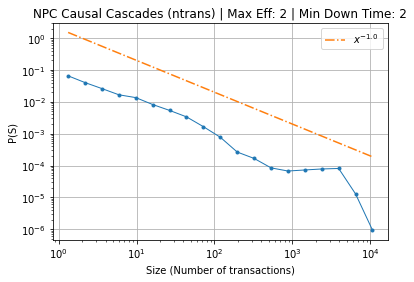

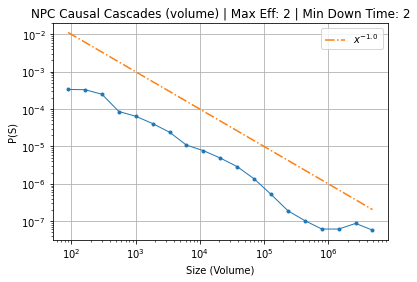

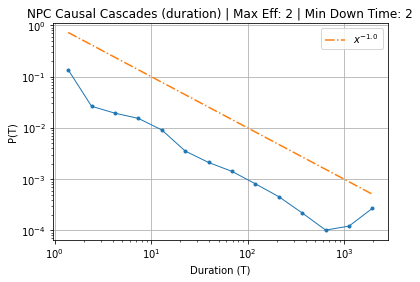

In [8]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

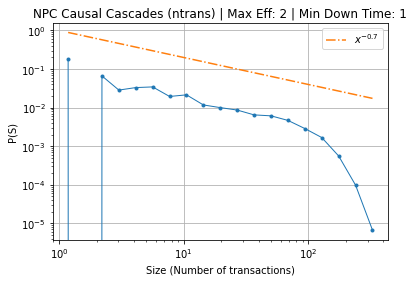

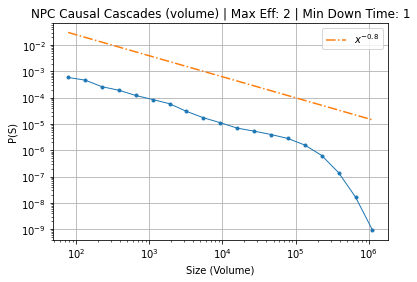

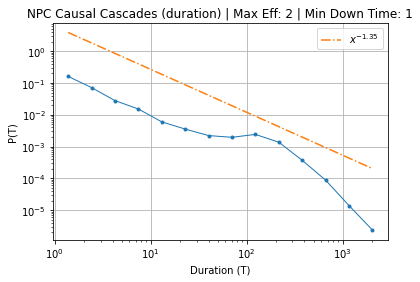

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

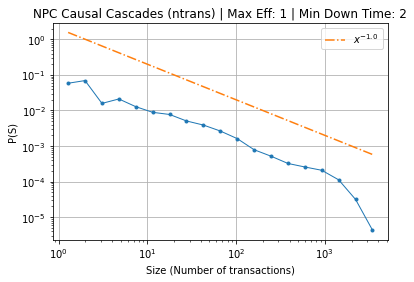

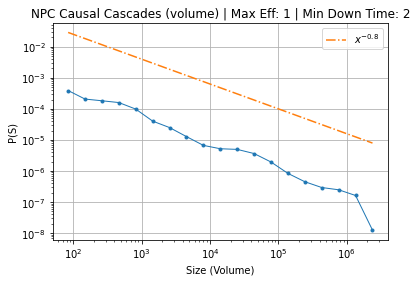

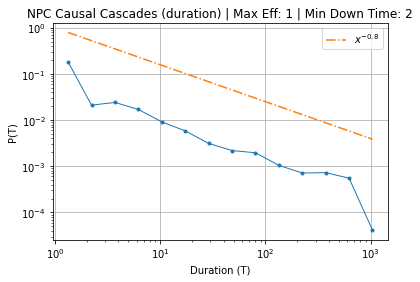

In [10]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_5_10_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8)*1, '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_5_10_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8)*1, '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_5_10_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

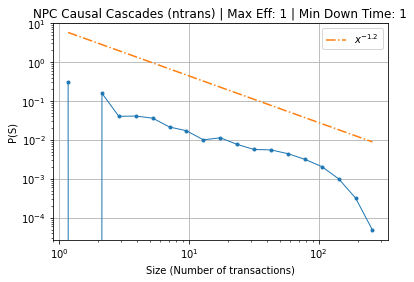

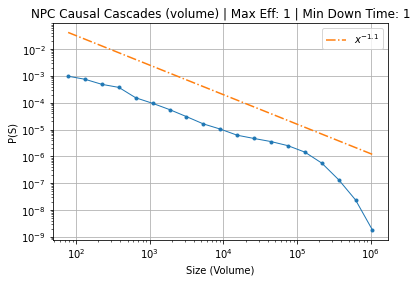

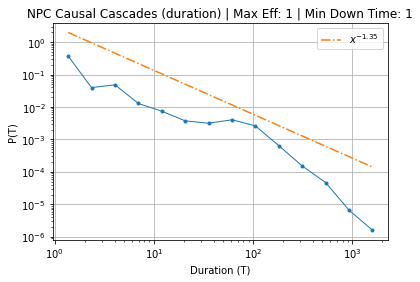

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]